
# Chapter 1 -> Spark ETL with SQL Database (MySQL | PostgreSQL)

Task to do 
1. Install required spark libraries
2. Create connection with PostgreSQL Database 
3. Read data from PostgreSQL Database
4. Transform data
5. write data into PostgreSQL Server

Spark Libraries

https://mvnrepository.com/artifact/org.postgresql/postgresql
'org.postgresql:postgresql:42.5.4'


In [1]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [3]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter1PostgreSQL")\
        .config('spark.jars.packages', 'org.postgresql:postgresql:42.5.4')\
        .getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.postgresql#postgresql added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-f75380b8-baa6-4226-bf72-e4bad1cc52b0;1.0
	confs: [default]
	found org.postgresql#postgresql;42.5.4 in central
	found org.checkerframework#checker-qual;3.5.0 in central
downloading https://repo1.maven.org/maven2/org/postgresql/postgresql/42.5.4/postgresql-42.5.4.jar ...
	[SUCCESSFUL ] org.postgresql#postgresql;42.5.4!postgresql.jar (1209ms)
downloading https://repo1.maven.org/maven2/org/checkerframework/checker-qual/3.5.0/checker-qual-3.5.0.jar ...
	[SUCCESSFUL ] org.checkerframework#checker-qual;3.5.0!checker-qual.jar (23267ms)
:: resolution report :: resolve 9626ms :: artifacts dl 24489ms
	:: modules in use:
	org.checkerframework#checker-qual;3.5.0 from central in [default]
	org.postgresql#postgresql;42.5.4 from central in [default]
	-------------------------------------------

2. Create connection with SQL Database
3. Read data from SQL Database

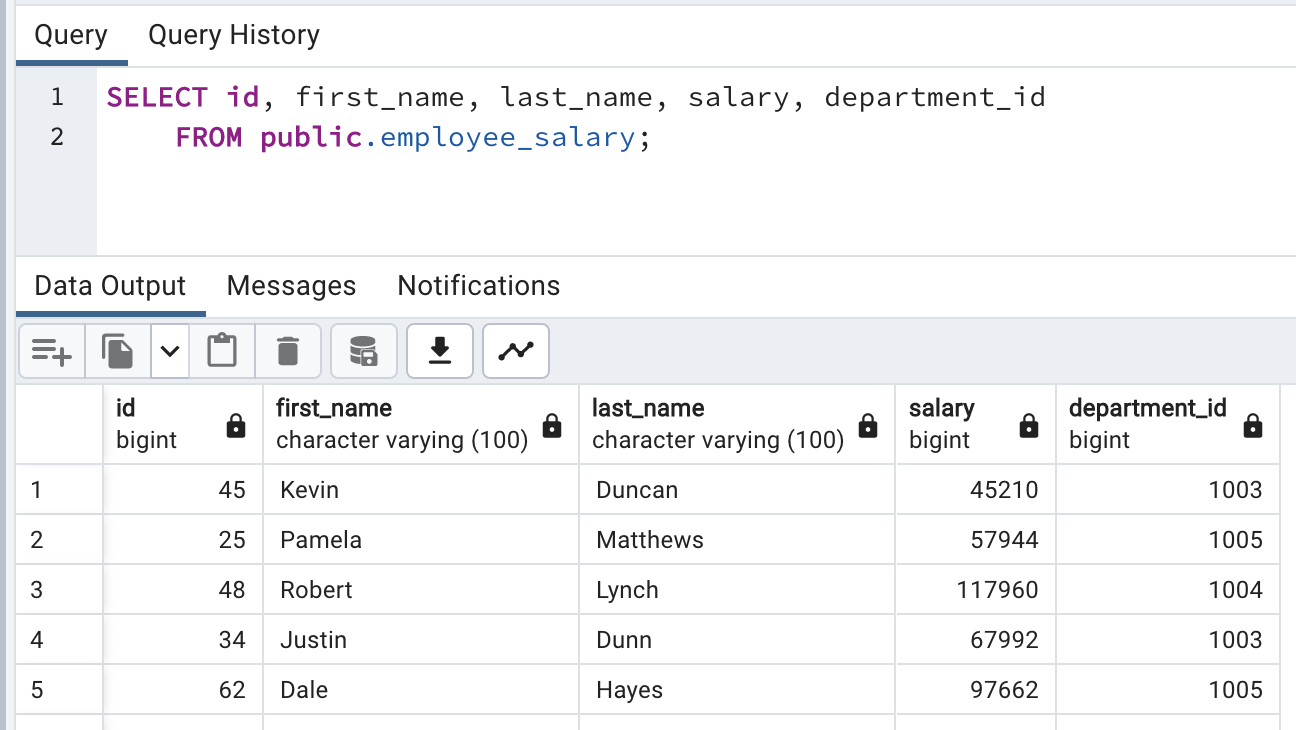


In [4]:
postgredf = spark.read.format("jdbc") \
    .option("url", "jdbc:postgresql://192.168.1.104:5432/postgres") \
    .option("driver", "org.postgresql.Driver") \
    .option("dbtable", "public.employee_salary") \
    .option("user", "postgres") \
    .option("password", "postgres")\
    .load()

In [5]:
postgredf.printSchema()

root
 |-- id: long (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- department_id: long (nullable = true)



In [7]:
postgredf.show(n=10)

+---+----------+---------+------+-------------+
| id|first_name|last_name|salary|department_id|
+---+----------+---------+------+-------------+
| 45|     Kevin|   Duncan| 45210|         1003|
| 25|    Pamela| Matthews| 57944|         1005|
| 48|    Robert|    Lynch|117960|         1004|
| 34|    Justin|     Dunn| 67992|         1003|
| 62|      Dale|    Hayes| 97662|         1005|
|  1|      Todd|   Wilson|110000|         1006|
| 61|      Ryan|    Brown|120000|         1003|
| 21|   Stephen|    Berry|123617|         1002|
| 13|     Julie|  Sanchez|210000|         1001|
| 55|   Michael|   Morris|106799|         1005|
+---+----------+---------+------+-------------+
only showing top 10 rows



In [9]:
postgredf.createOrReplaceTempView("tempPostgreSQL")

4. Transform data

In [10]:
sqlContext.sql("SELECT * FROM tempPostgreSQL").show(n=5)

+---+----------+---------+------+-------------+
| id|first_name|last_name|salary|department_id|
+---+----------+---------+------+-------------+
| 45|     Kevin|   Duncan| 45210|         1003|
| 25|    Pamela| Matthews| 57944|         1005|
| 48|    Robert|    Lynch|117960|         1004|
| 34|    Justin|     Dunn| 67992|         1003|
| 62|      Dale|    Hayes| 97662|         1005|
+---+----------+---------+------+-------------+
only showing top 5 rows



In [13]:
newdf = sqlContext.sql("SELECT first_name,salary FROM tempPostgreSQL WHERE salary > 50000")

In [14]:
newdf.count()

59

5. write data into SQL Server

In [15]:
newdf.write \
  .format("jdbc") \
  .option("url", "jdbc:postgresql://192.168.1.104:5432/postgres") \
  .option("driver", "org.postgresql.Driver") \
  .option("dbtable", "public.employee1") \
  .option("user", "postgres") \
  .option("password", "postgres")\
  .save()

It created table and loaded data into table

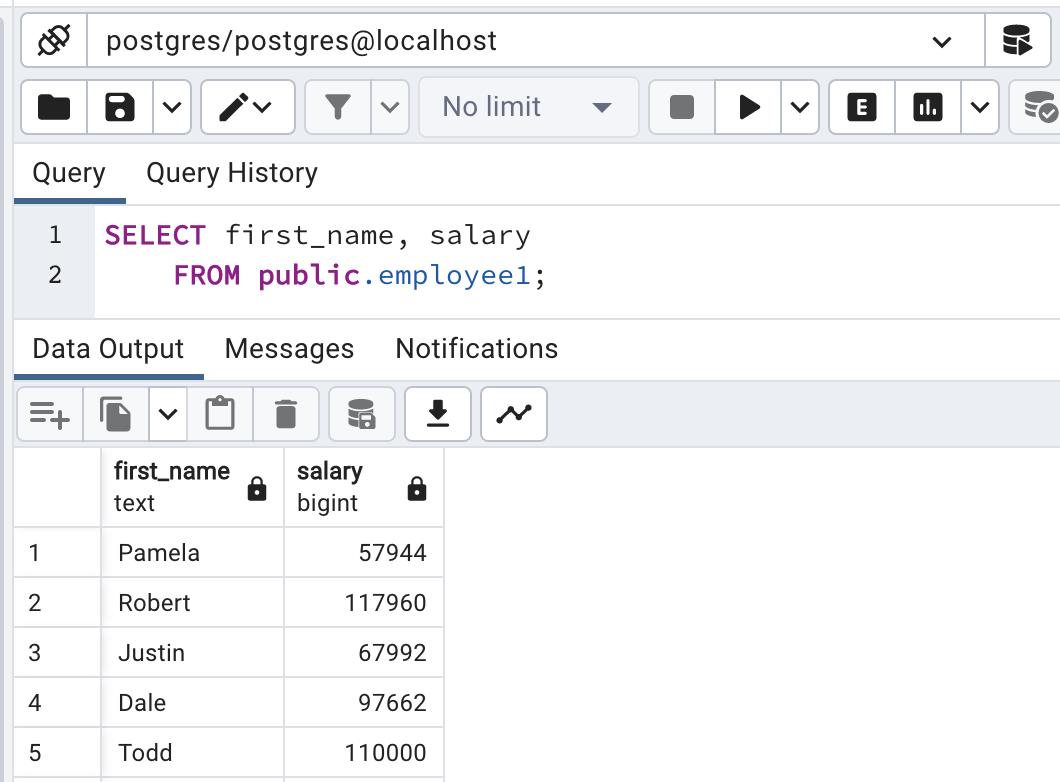